# Part II - (Ford GoBike System Dataset)
## by (Emmanuel Chisom Egwuonwu)


## Investigation Overview

For this presentation, more emphasis will be laid on the main features of interest i.e the number of bike hired and the duration for the bike trips. Univariate barplots are used to illustrate the distribution of bike counts over some features in the dataset such as day of the week and hour of the day. 

The features of the dataset that is related to the trip duration are also presented. These features include the user type, the gender and the age group of the bike riders.

A multivariate heatmap is presentd to show a breakdown of the number of bike riders during each hour of the day grouped according to the gender and type of user.


## Dataset Overview

The Ford GoBike System Dataset includes information abdout individual rides made in a bike sharing system covering the greater San Francisco Bay area. The Dataset contains 183412 trip entries (rows) and 16 trip features (columns). The features include: (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). These features are classified into three broad areas namely:
1. Trip Duration
2. Station Information
3. Members' Personal Information


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_bike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# Create a copy of the dataset
ford_gobike = ford_bike.copy()
# Filling null entries in these columns with 'None'
ford_gobike.start_station_name.fillna("None", inplace = True)
ford_gobike.end_station_name.fillna("None", inplace = True)
ford_gobike.member_gender.fillna("None", inplace = True)

#Filling null entries in these columns with '0'
ford_gobike.start_station_id.fillna(0, inplace = True)
ford_gobike.end_station_id.fillna(0, inplace = True)

#Fill null entries with the mean
ford_gobike.member_birth_year.fillna(ford_gobike.member_birth_year.mean(), inplace = True)


In [4]:
# Convert the start and end time to datetime
ford_gobike.start_time = pd.to_datetime(ford_gobike.start_time)
ford_gobike.end_time = pd.to_datetime(ford_gobike.end_time)

# Convert user_type and member_gender to category datatype
ford_gobike.user_type = ford_gobike.user_type.astype('category')
ford_gobike.member_gender = ford_gobike.member_gender.astype('category')

# Convert member birth year to integer
ford_gobike.member_birth_year = ford_gobike.member_birth_year.astype(int)

In [5]:
# Add columns for hour of day, day of week and member age
ford_gobike['start_hour'] = ford_gobike.start_time.dt.strftime('%H')
ford_gobike['start_day'] = ford_gobike.start_time.dt.strftime('%A')
ford_gobike['member_age'] = 2019 - ford_gobike['member_birth_year']

# Changing the datatype of the days of the week
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
ford_gobike['start_day'] = ford_gobike['start_day'].astype(weekday_categ)

## Number of bikes at each Day-Hour


The barplot shown below represent the distribution of the trip during the hours of the day. This plot gives insight into the number of bikes hired at each hour of the day. It can be seen that the peak hour with the highest bike riders is 5pm when most employees and students have closed from their day's activities. Another peak hour is recorded at 8am when most students are going to school and most employees are going to work.

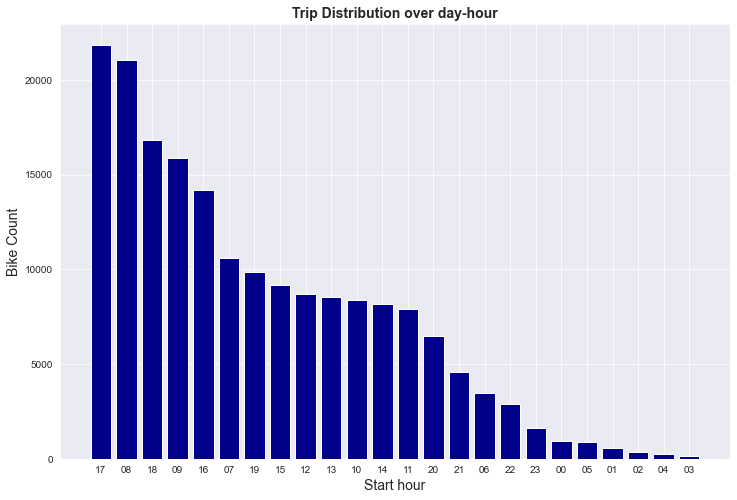

In [6]:
# Plotting a bar chart to show the trip distribution over day-hour
sns.set_style("darkgrid")

def figure_basics(title: str, xlabel = str, ylabel = str):
    plt.figure(figsize = [12, 8])
    plt.title(title, fontsize=14, fontweight = 'bold')
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

figure_basics("Trip Distribution over day-hour", "Start hour", 'Bike Count')
plt.bar(x = ford_gobike.start_hour.value_counts().keys(), height = ford_gobike.start_hour.value_counts(),
              color = "darkblue", );
plt.show()

## Number of bikes on each Week-Day

The barplot shown below represent the distribution of the trip during the days of the week. This plot gives insight into the number of bikes hired on each day of the week. It can be clearly observed from the barplot that the highest count of bike riders is obtained on Thursday of the week and the lowest counts are obtained during the weekends (Saturday and Sunday).

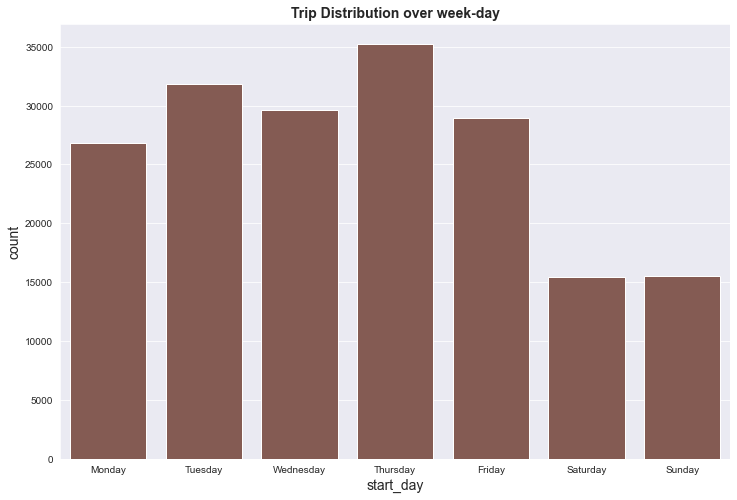

In [7]:
# Plotting a bar chart to show the trip distribution over week-day
figure_basics("Trip Distribution over week-day", "Start day", 'Bike Count')
sns.countplot(data = ford_gobike, x= 'start_day', color = "tab:brown", );
plt.show()

## Trip Duration vs User -Types

The barplot shown below depicts the relationship between the trip duration and the user types. This plot gives insight into the type of users that have longer trip durations. The barplot below indicates that customers have higher trip durations compared to the subscribers.

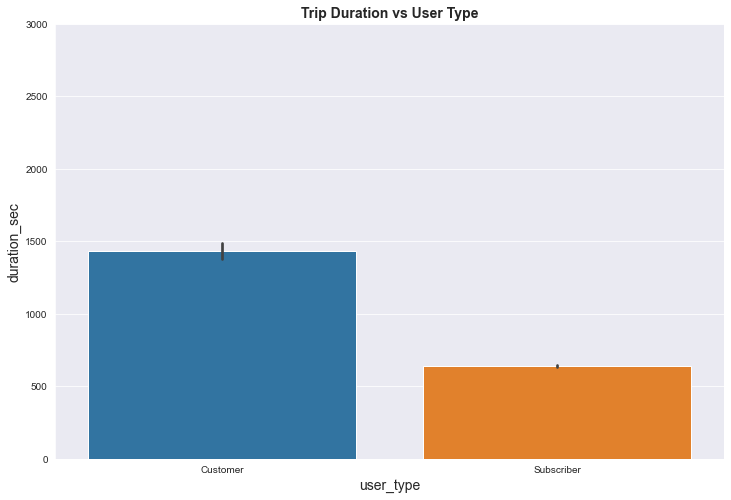

In [8]:
# Plotting a boxplot showing the relationship between the user type and trip duration
figure_basics("Trip Duration vs User Type", "User Type", 'Trip Duration (sec)')
sns.barplot(data = ford_gobike, x = "user_type", y = "duration_sec")
plt.ylim(0, 3000)
plt.show()

## Trip Duration vs Members' Gender

The boxplot shown below depicts the relationship between the trip duration and the gender of the members. This plot gives insight into the gender of the members that have longer trip durations. The boxplot shows that the female members have the highest trip duration compared to the male members. Members with other gender also have a high trip duration.

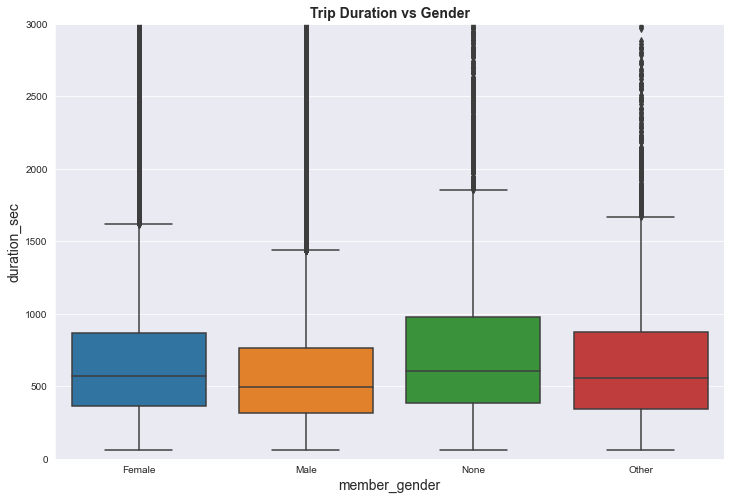

In [9]:
# Plotting a boxplot showing the relationship between the member gender and trip duration
figure_basics("Trip Duration vs Gender", "Member Gender", 'Trip Duration (sec)')
sns.boxplot(data = ford_gobike, x = "member_gender", y = "duration_sec")
plt.ylim(0, 3000)
plt.show()

## Trip Duration vs Members' Age Group

The scatterplot shown below depicts the relationship between the trip duration and the age group of the members. This plot gives insight into the age group of the users that have longer trip durations. The scatterplot shows that young members between the ages of 25 and 40 years have higher trip duration compared to the older members.

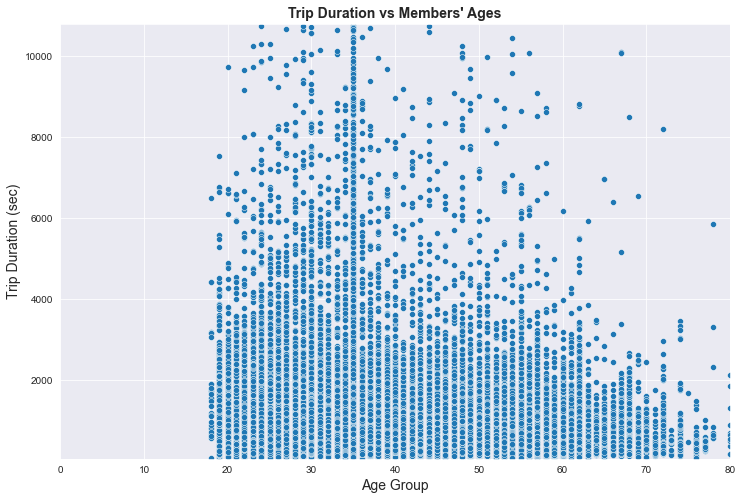

In [10]:
# Plotting a scatterplot to show the relationship between the trip duration and the ages of the members
figure_basics("Trip Duration vs Members' Ages", "Age Group", 'Trip Duration (sec)')
sns.scatterplot(data = ford_gobike, y = "duration_sec", x = "member_age")
plt.xlim(0, 80)
plt.ylim(60, 10800)
plt.show()


## Trip Duration for each Day by User Type

The boxplot shown below gives insight on the trip duration for each day classified by the user type. It can be observed from the boxplot above that customers have longer trip duration than the subscribers consistently throughout the week days and higher trip durations were recorded during the weekends (Saturday and Sunday).

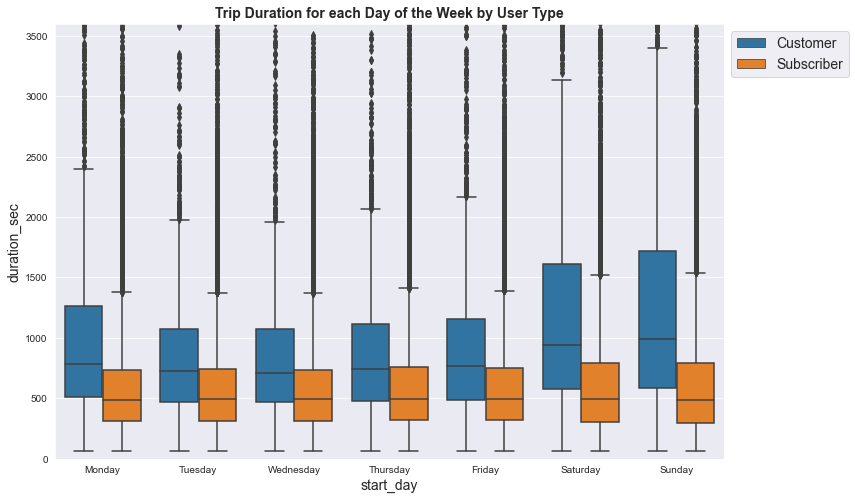

In [11]:
# Plotting a boxplot that shows the distribution of trip duration for each day of the week by user type
figure_basics("Trip Duration for each Day of the Week by User Type", "Day of Week", 'Trip Duration (sec)')
sns.boxplot(data = ford_gobike, x = "start_day" , y = "duration_sec", hue = "user_type" )
plt.ylim(0, 3600)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

## Distribution of bike counts over Gender, User Type and the Ride Hour

The heatmap illustrated below shows a breakdown of the number of bike riders during each hour of the day grouped according to the gender and type of user. It can be observed that the male and female subscribers are the highest bike riders suring the early hours of 8-9am and late evenings (5-6pm).

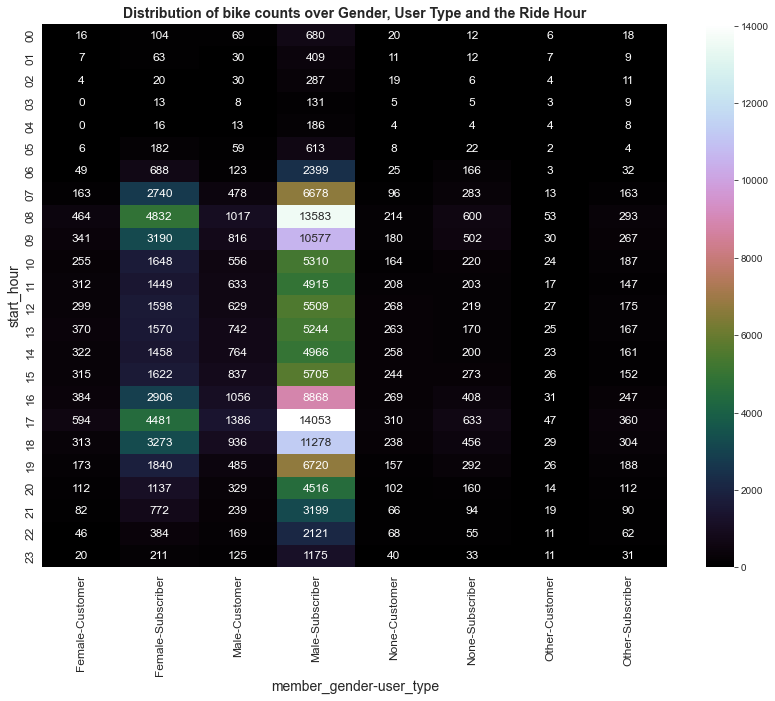

In [12]:
# Grouping the data using, Hour, Gender, and User Type
data_group = ford_gobike.groupby(['start_hour', 'member_gender', 'user_type']).size().reset_index(name='count')
# fixing the layout of the dataset
data_group = data_group.pivot(index='start_hour', columns=['member_gender', 'user_type'], values = 'count')

#Defining a function to specify plot details
def plot_basics(title: str, xlabel = str, ylabel = str):
    plt.figure(figsize = [14, 10])
    plt.title(title, fontsize=14, fontweight = 'bold')
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plot_basics('Distribution of bike counts over Gender, User Type and the Ride Hour', 'Gender - User Type', 'Hour of the Day')

# plotting the graph
sns.heatmap(data_group, annot=True, annot_kws = {'fontsize' : 12}, fmt='.0f', cmap='cubehelix')
plt.show()

In [ ]:
!jupyter nbconvert Part_II_Data_Explanation_FordGoBike.ipynb --to slides --post serve --no-input --no-prompt